# k-平均演算法(k-Mean Clustering)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import random

# MNIST Dataset

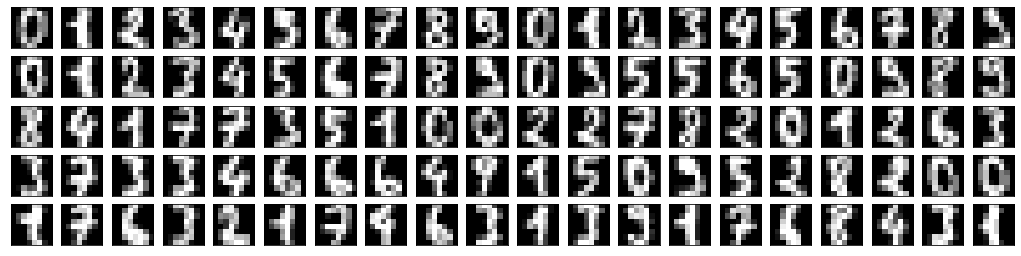

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data/16
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# k-Mean

In [7]:
k=10
N,M=X.shape
init_index=np.zeros(k)
for i in range(k):
    index=np.random.randint(0,N,1)
    while(y[index]!=i):
        index=np.random.randint(0,N,1)
    init_index[i]=index
init_index=init_index.astype(int)
k_mean=X[init_index]
max_iter=100
for t in range(max_iter):
    dist=sp.spatial.distance.cdist(X,k_mean,metric='euclidean')
    cluster_index=np.argmin(dist,axis=1)
    for i in range(k):
        BOOL=(cluster_index==i)
        k_mean[i]=np.mean(X[BOOL],axis=0)

# Dimensionality Reduction

In [8]:
X_embedded=PCA(X,2,N)
print("the k-mean clustering error rate: ",1-np.sum(y==cluster_index)/N)

the k-mean clustering error rate:  0.2359488035614914


# Plot

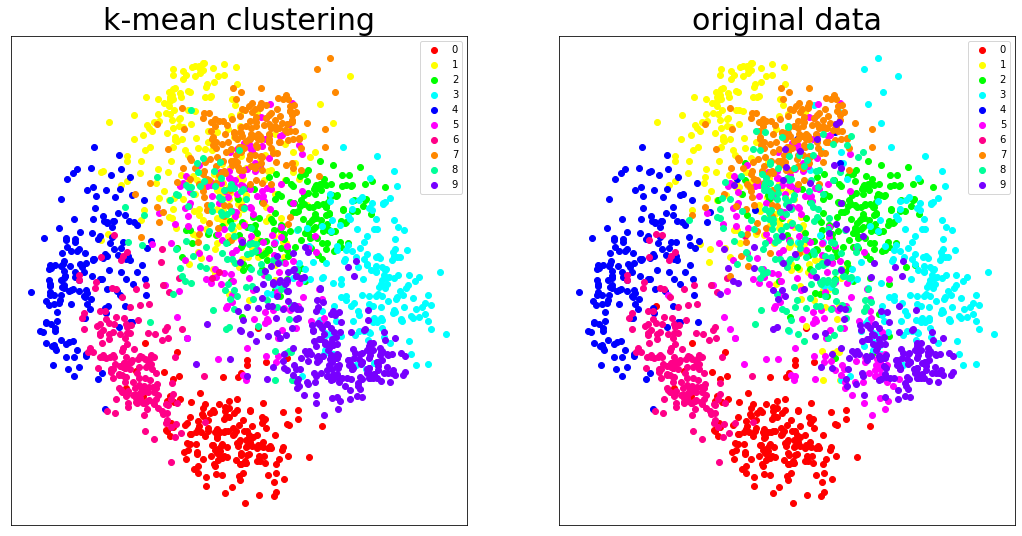

In [9]:
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,9)
fig , ax = plt.subplots()
plt.subplot(1, 2, 1)
for i in range(0,10):
    BOOL=(cluster_index==i)
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[i],label=i)
plt.title("k-mean clustering",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.subplot(1, 2, 2)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[i],label=i)
plt.title("original data",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.show()